# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#print(f"The latitude information received is : {lat}")
#print(f"The longitude information received is: {lng}")
#print(f"The temperature information received is: {temp}")


# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create a url
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
my_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(my_url+ city).json()
print(response)
#response_json = response.json()
#print(json.dumps(response_json, indent = 4, sort_keys = True))

{'coord': {'lon': -101.6677, 'lat': 50.1333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.29, 'feels_like': 80.04, 'temp_min': 80.29, 'temp_max': 80.29, 'pressure': 1015, 'humidity': 39, 'sea_level': 1015, 'grnd_level': 951}, 'visibility': 10000, 'wind': {'speed': 6.73, 'deg': 192, 'gust': 8.7}, 'clouds': {'all': 14}, 'dt': 1661032043, 'sys': {'country': 'CA', 'sunrise': 1660995828, 'sunset': 1661046998}, 'timezone': -21600, 'id': 6078359, 'name': 'Moosomin', 'cod': 200}


In [59]:
# Create a lists to hold city information
lat =[]
lon= []
date = []
country = []
Cities = []
temp = []
humidity = []
cloudiness =[]
wind_speed = []

print ("-------------------------")
#add preak between api 
#time.sleep(1)

#Loop through the cities 
for city in cities: 
    

    try:
    
        response = requests.get(my_url +city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        Cities.append(city)
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        print(f"Traced {city}")
     
        
    except:
        print(f"This City Cannot Be Traced: {city}")




-------------------------
Traced luganville
Traced aklavik
Traced boshan
Traced lorengau
Traced punta arenas
Traced amahai
Traced mataura
Traced ayan
Traced rikitea
Traced hami
Traced upernavik
Traced kapaa
Traced faanui
Traced conceicao do araguaia
Traced kysyl-syr
Traced khatanga
Traced thompson
Traced los llanos de aridane
Traced lichuan
Traced mar del plata
Traced college
Traced jamestown
Traced mahebourg
Traced constitucion
Traced leningradskiy
Traced barra patuca
Traced acapulco
Traced halifax
Traced saskylakh
Traced kigoma
Traced sao joao da barra
Traced carnarvon
Traced barrow
Traced palmer
Traced domoni
Traced watsa
Traced synya
Traced port hedland
Traced touros
This City Cannot Be Traced: lolua
Traced ushuaia
Traced ust-kuyga
Traced bluff
Traced hilo
Traced gold coast
Traced khao yoi
Traced nanortalik
Traced seoul
Traced kodiak
Traced castro
Traced tuktoyaktuk
Traced libertador general san martin
Traced komsomolskiy
Traced hermanus
Traced machilipatnam
This City Cannot Be Tra

Traced caravelas
This City Cannot Be Traced: mrirt
Traced verkhoyansk
Traced kenai
Traced tabas
Traced benguela
Traced lodja
Traced inhambane
Traced ilheus
Traced wad rawah
Traced acarau
Traced orzhytsya
Traced erenhot
Traced benalla
Traced padang
This City Cannot Be Traced: artyk
Traced kisangani
This City Cannot Be Traced: katsiveli
Traced carahue
Traced atherton
Traced moron
Traced kuala terengganu
Traced kapitanivka
Traced homer
This City Cannot Be Traced: barbar
Traced yerbogachen
Traced mattru
Traced paris
Traced mbandaka
Traced hasaki
Traced avera
Traced vila velha
This City Cannot Be Traced: jiddah
Traced casablanca
Traced central point
Traced katobu
Traced port hardy
Traced san buenaventura
Traced bamiantong
Traced pushkino
Traced markova
Traced podor
Traced esperance
Traced turayf
Traced vao
Traced pointe-noire
Traced sakakah
Traced panguna
Traced ewa beach
Traced krasnoselkup
Traced divnomorskoye
Traced rocha
Traced pandan
Traced lokosovo
Traced korla
Traced xai-xai
Traced b

In [ ]:
# Get weather data
weather_response = requests.get(my_url)
weather_json = weather_response.json()
weather_json

In [171]:
#read the csv_file
city_data = pd.read_csv('cities.csv')
city_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [193]:
city_daya = pd.DataFrame(    
    {
    "City": foundCities,
    "Country": country,
    "Temperature": temp,
    "Latitude": lat,
    "Longitude": lon,
    "Date": date
    }
)




city_data.to_csv("city_data.scv", index = False)

city_data.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [194]:
city_data.describe()

,City_ID,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,273.500000,49.405109,1.558379e+09,67.671533,19.665146,20.675529,64.970785,8.672682
std,158.338246,36.914201,7.820486e+01,23.697626,33.623560,90.307948,18.704318,5.865974
min,0.000000,0.000000,1.558378e+09,4.000000,-54.810000,-173.230000,4.920000,0.540000
25%,136.750000,13.750000,1.558379e+09,52.000000,-6.267500,-61.015000,53.970000,4.680000
50%,273.500000,46.500000,1.558379e+09,71.000000,21.390000,21.240000,64.990000,7.010000
75%,410.250000,81.000000,1.558379e+09,86.000000,47.887500,102.937500,80.600000,11.410000
max,547.000000,100.000000,1.558379e+09,290.000000,78.220000,179.320000,104.100000,46.080000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [195]:
#  Get the indices of cities that have humidity over 100%.
clcity_data = city_data.drop(cityDATA[cityDATA["Humidity"]>100].index)
clcityDATA

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,luganville,VU,79.92,73,64,10.33,-15.5333,167.1667,1661033189
1,aklavik,CA,50.52,70,100,4.83,68.2191,-135.0107,1661033189
2,boshan,CN,66.15,68,80,4.14,36.4833,117.8333,1661033190
3,lorengau,PG,80.38,80,58,8.34,-2.0226,147.2712,1661032922
4,punta arenas,CL,39.11,69,46,7.94,-53.1500,-70.9167,1661033190
...,...,...,...,...,...,...,...,...,...
580,lockport,US,75.88,89,0,6.91,41.5895,-88.0578,1661033379
581,diapaga,BF,72.57,88,79,3.78,12.0708,1.7889,1661033180
582,kargasok,RU,48.29,94,100,12.06,59.0556,80.8572,1661033379
583,matay,EG,87.03,33,0,9.46,28.4190,30.7792,1661033379


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

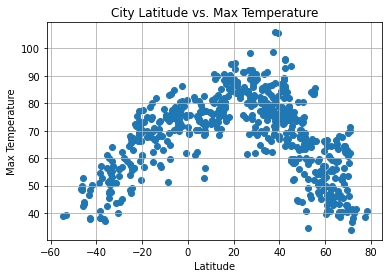

In [61]:
#The first requirement is to create a series of scatter plots.

x = clcityDATA['Latitude']
y = clcityDATA['Temperature']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

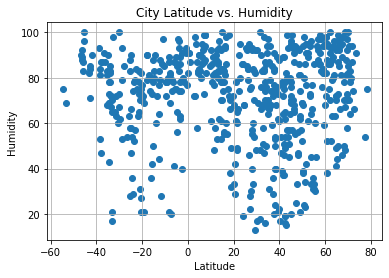

In [62]:
x = clcityDATA['Latitude']
y = clcityDATA['Humidity']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

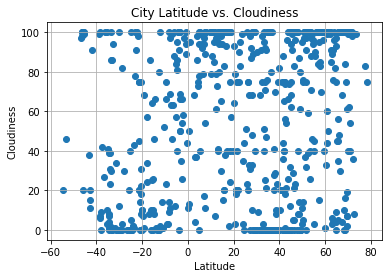

In [63]:
x = clcityDATA['Latitude']
y = clcityDATA['Cloudiness']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

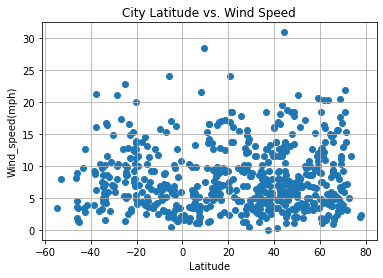

In [68]:
x = clcityDATA['Latitude']
y = clcityDATA['Windspeed']
plt.scatter(x,y)
plt.grid()

# Add labels
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind_speed(mph)")
plt.show()

## Linear Regression

In [69]:
northernData = clcityDATA.loc[clcityDATA["Latitude"] > 0]
southernData = clcityDATA.loc[clcityDATA["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [104]:
x_values = northernData["Latitude"]
y_values = northernData["Temperature"]

The r-value is -0.6470113464938266


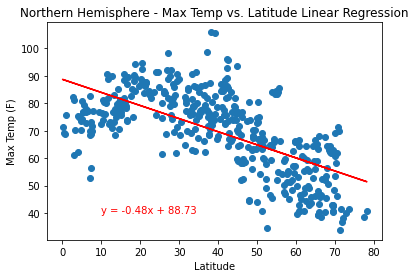

In [105]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line_eq,(10,40),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [106]:
x_values = southernData["Latitude"]
y_values = southernData["Temperature"]

The r-value is 0.8343767707762308


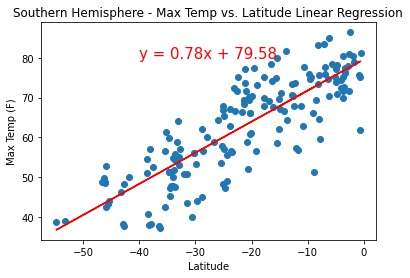

In [108]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line,(-40,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()

In [109]:
x_values = northernData["Latitude"]
y_values = northernData["Humidity"]

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.01877264371430891


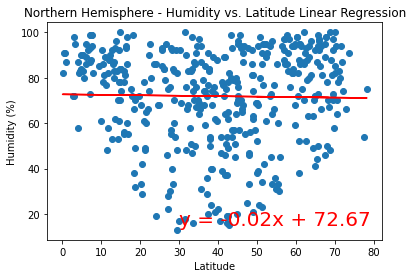

In [117]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line_eq,(30,15),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()

In [126]:
x_values = southernData["Latitude"]
y_values = southernData["Humidity"]

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.029178116935350853


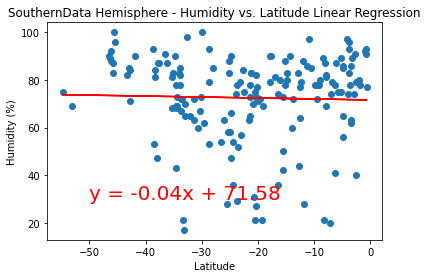

In [127]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line_eq,(-50,30),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title('SouthernData Hemisphere - Humidity vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()

In [128]:
x_values = northernData["Latitude"]
y_values = northernData["Cloudiness"]

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.01077050127601224


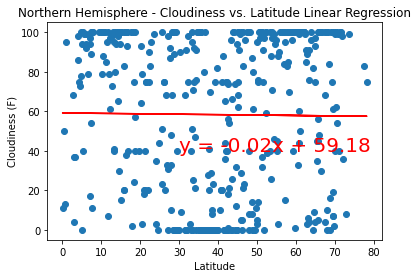

In [133]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line,(30,40),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (F)')

plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [134]:
x_values = southernData["Latitude"]
y_values = southernData["Cloudiness"]

The r-value is 0.12891672916313865


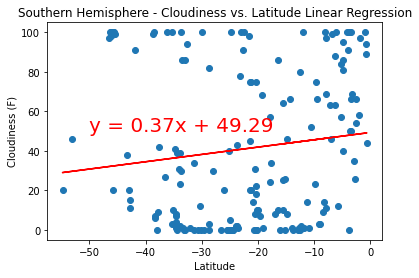

In [137]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line,(-50,50),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (F)')

plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [143]:
x_values = northernData["Latitude"]
y_values = northernData["Windspeed"]

The r-value is 0.06278241836166085


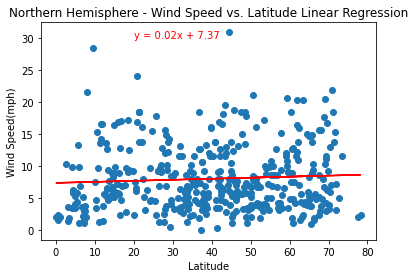

In [150]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line,(20,30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [151]:
x_values = southernData["Latitude"]
y_values = southernData["Windspeed"]

The r-value is -0.042813303320665935


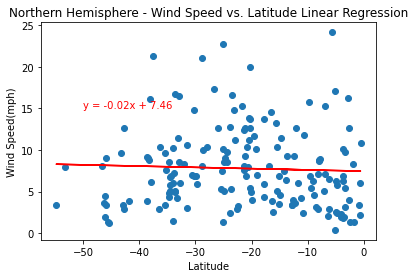

In [161]:
(slope, intercept, rvalue, pvalu, stderr) = linregress(x_values, y_values)
reg_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,reg_values,"r-")

plt.annotate(line,(-50,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f'The r-value is {rvalue}')
plt.show()